# Read the csv file

In [57]:
import pandas as pd
import numpy as np

data = pd.read_csv("train.csv")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Cleaning data

In [58]:
class Cleaner:
    def __init__(self, df):
        self.df = df

    def clean(self):
        self.drop_unwanted()
        self.convert_text()
        self.convert_symbol()
        self.convert_int()
        self.switch()
        return self.df
    
    def drop_unwanted(self):
        self.df = self.df.drop(["Loan_ID"], axis=1)

    def convert_text(self):
        tab = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
        for col in tab:
            properties = self.df[col].unique()
            property2index = {prop:i for (i, prop) in enumerate(properties)}
            max_index = max(list(property2index.values()))
            self.df.loc[:, col] = self.df[col].replace(property2index)
            self.df[col].fillna(max_index + 1)

    def convert_symbol(self):
        self.df["Dependents"] = self.df["Dependents"].str.replace("+", "")

    def convert_int(self):
        self.df = self.df.fillna(0)
        self.df = self.df.astype("int64")

    def switch(self):
        for col in ["Education", "Loan_Status"]:
            self.df[col] = 1 - self.df[col]

    def categorical_to_numerical(self):
        col = ["Gender", "Married", "Education", "Self_Employed", "Property_Area", "Loan_Status"]

cleaner = Cleaner(data)
data = cleaner.clean()
data

C:\Users\alexf\AppData\Local\Temp\ipykernel_13140\1057000555.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.df.loc[:, col] = self.df[col].replace(property2index)
C:\Users\alexf\AppData\Local\Temp\ipykernel_13140\1057000555.py:23: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.df[col].fillna(max_index + 1)
C:\Users\alexf\AppData\Local\Temp\ipykernel_13140\1057000555.py:29: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=Fa

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0,0,360,1,0,1
1,0,1,1,1,0,4583,1508,128,360,1,1,0
2,0,1,0,1,1,3000,0,66,360,1,0,1
3,0,1,0,0,0,2583,2358,120,360,1,0,1
4,0,0,0,1,0,6000,0,141,360,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,2900,0,71,360,1,1,1
610,0,1,3,1,0,4106,0,40,180,1,1,1
611,0,1,1,1,0,8072,240,253,360,1,0,1
612,0,1,2,1,0,7583,0,187,360,1,0,1


# Data Visualization

# Correlation Matrix

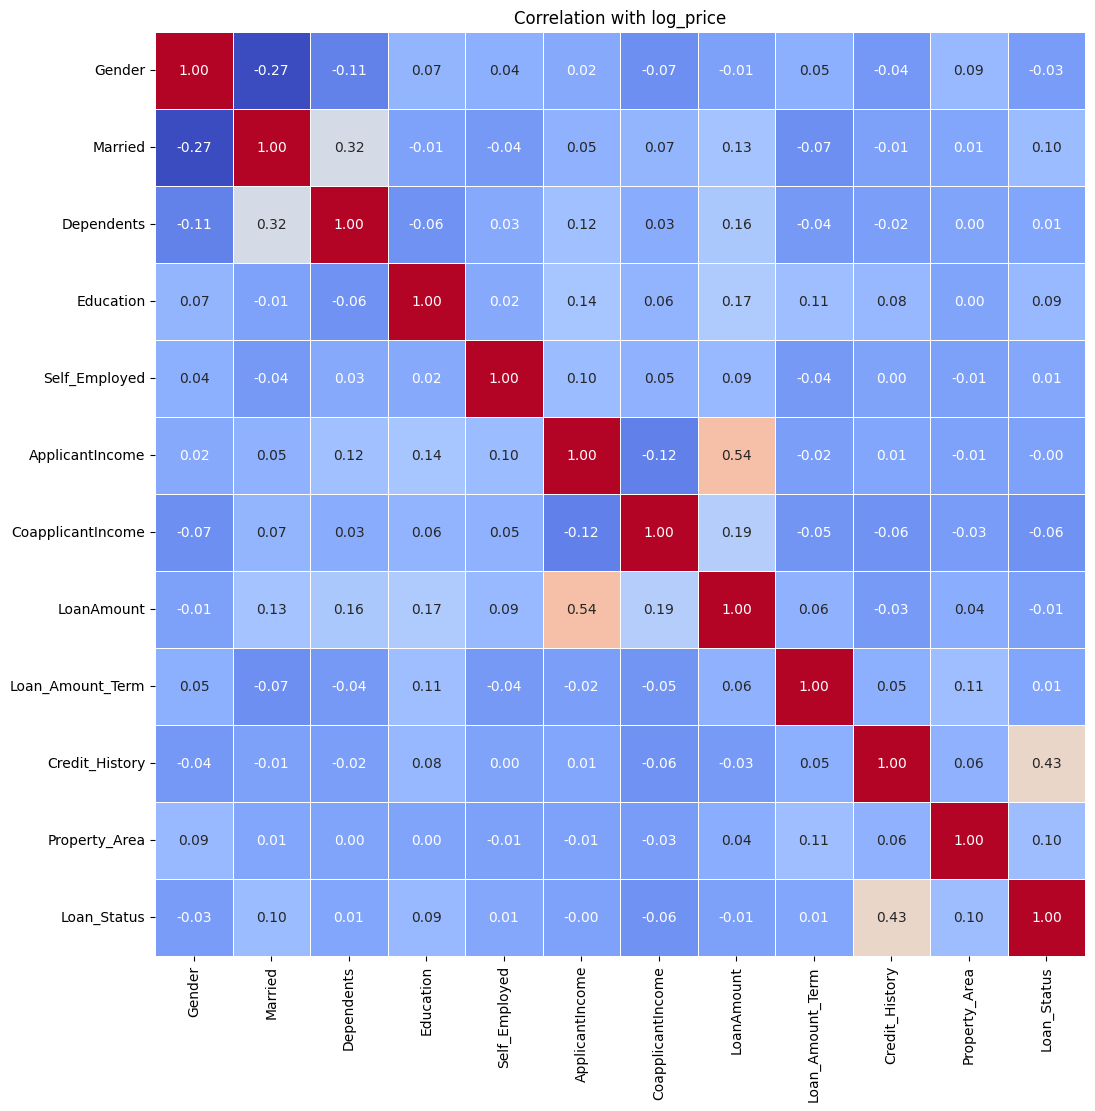

In [65]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 12))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar=False)
plt.title('Correlation with log_price')
plt.show()

# Distribution

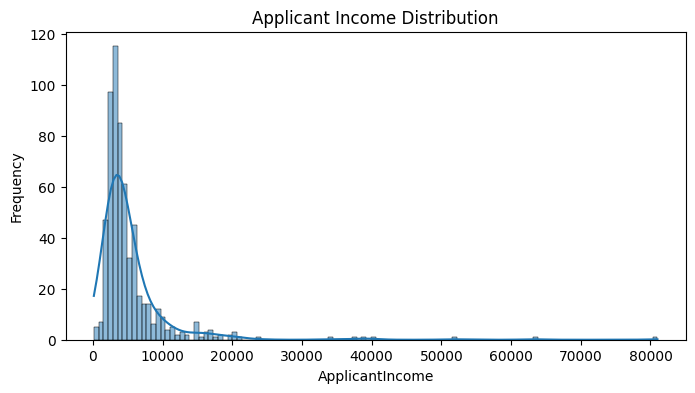

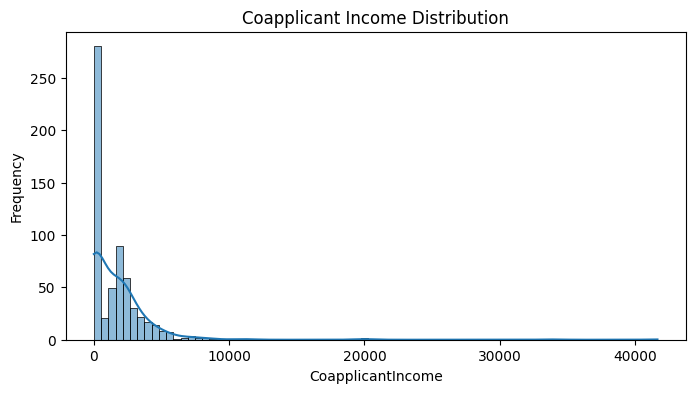

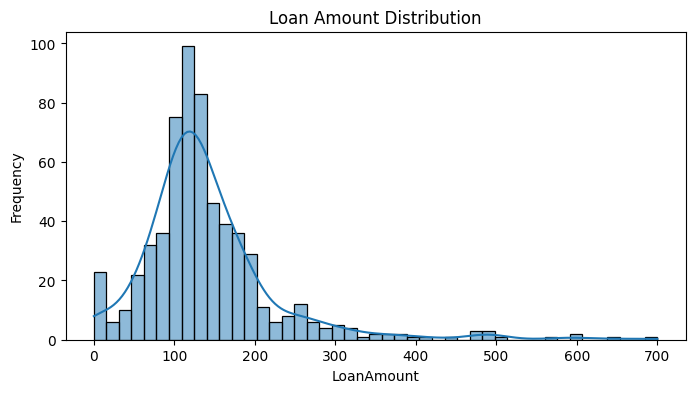

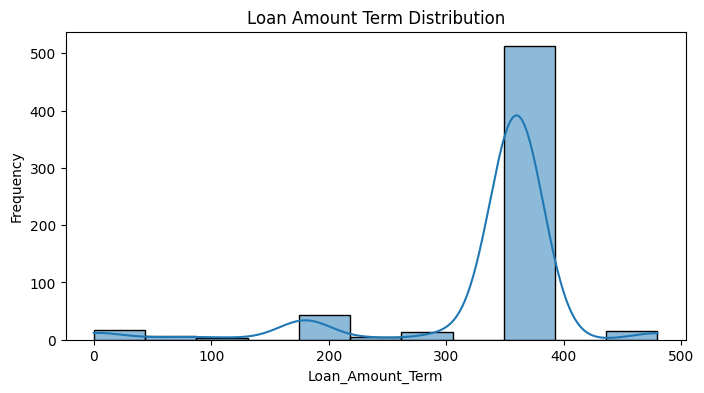

In [60]:
def plot_distribution(column, title):
    plt.figure(figsize=(8, 4))
    sns.histplot(data=data, x=column, kde=True)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

plot_distribution("ApplicantIncome", "Applicant Income Distribution")
plot_distribution("CoapplicantIncome", "Coapplicant Income Distribution")
plot_distribution("LoanAmount", "Loan Amount Distribution")
plot_distribution("Loan_Amount_Term", "Loan Amount Term Distribution")


# Import Libriaries

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# DecisionTreeClassifier

In [62]:
from sklearn.tree import DecisionTreeClassifier

X = data.drop(["Loan_Status"], axis=1)
Y = data["Loan_Status"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

Y_pred = dtc.predict(X_test)

print("test accuracy",accuracy_score(Y_test, Y_pred))
print("train accuracy",accuracy_score(Y_train, dtc.predict(X_train)))

test accuracy 0.6747967479674797
train accuracy 1.0


# RandomForestClassifier

In [17]:
from sklearn.ensemble import RandomForestClassifier


X = data.drop(["Loan_Status"], axis=1)
Y = data["Loan_Status"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

test_scores = []

tab = []
for i in range(1, 20):
    tab.append(i*5)

tab

tab1 = []
tab2 = []
tab3 = []

for max_dep in range(1, 10):
    # Iterate over different values of random_state
    for rand_state in tab:
        # Iterate over different values of n_estimators
        for n_est in tab:

            tab1.append(max_dep)
            tab2.append(rand_state)
            tab3.append(n_est)

            rfc = RandomForestClassifier(n_estimators=n_est, max_depth=max_dep, min_samples_split=5, random_state=rand_state)
            rfc.fit(X_train, Y_train)

            Y_pred = rfc.predict(X_test)

            test_scores.append(accuracy_score(Y_test, Y_pred))


print("--------------------------------------------------------------------")
print("test accuracy",max(test_scores))
print("parameter")
print("max_depth",tab1[test_scores.index(max(test_scores))])
print("random_state",tab2[test_scores.index(max(test_scores))])
print("n_estimators",tab3[test_scores.index(max(test_scores))])


--------------------------------------------------------------------
test accuracy 0.7886178861788617
parameter
max_depth 4
random_state 15
n_estimators 30


# Best model with best parameters

Model : RandomForestClassifier
Parameters:
    (n_estimators=45, 
    max_depth=3, 
    min_samples_split=5, 
    random_state=70)

In [66]:
from sklearn.ensemble import RandomForestClassifier

X = data.drop(["Loan_Status"], axis=1)
Y = data["Loan_Status"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=0)

rfc = RandomForestClassifier(
    n_estimators=45, 
    max_depth=3, 
    min_samples_split=5, 
    random_state=70)

rfc.fit(X_train, Y_train)

Y_pred = rfc.predict(X_test)

print("test accuracy",accuracy_score(Y_test, Y_pred))
print("train accuracy",accuracy_score(Y_train, rfc.predict(X_train)))

test accuracy 0.8130081300813008
train accuracy 0.7739307535641547
